In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Red vs. Blue Simulation 

**Variables**

$R = \text{# of Red Divisions}$

$B = \text{# of Blue Divisions}$

$D_R = \text{red rate of attrition due to direct Fire (units/hour)}$

$D_B = \text{blue rate of attrition due to direct Fire (units/hour)}$

$I_R = \text{red rate of attrition due to indirect Fire (units/hour)}$

$I_B = \text{blue rate of attrition due to indirect Fire (units/hour)}$

**Assumptions**

$D_R = a_1B$

$D_B = a_2R$

$I_R = b_1BR$

$I_B = b_2BR$

$R, B \geq 0$

$R(0) = 5, B(0) = 2$

$a_1, a_2, b_1, b_2 \text{ are all positive}$

$a_1 > a_2; b_1 > b_2$

**Objective**

Determine conditions under which $R \rightarrow 0$ and $B \rightarrow 0$

### Version 1 w/ For Loop


```python
def deltaX1(R, B, lambda_): 
    return -lambda_*0.05*B - lambda_*0.005*B*R

def deltaX2(R, B): 
    return-0.05*B - 0.005*B*R

def red_vs_blueSIM(lambda_, L, N):  
    for i in range(N):
        x1_last, x2_last = L[-1][0], L[-1][1]
        x1_next = x1_last + deltaX1(x1_last, x2_last, lambda_)
        x2_next = x2_last + deltaX2(x1_last, x2_last)
        L.append([x1_next, x2_next])
        result = L
    return result
```

### Version 2 w/ While Loop

In [2]:
def deltaX1(R, B, lambda_): 
    return -lambda_*0.05*B - lambda_*0.005*B*R

def deltaX2(R, B): 
    return-0.05*B - 0.005*B*R


def red_vs_blueSIM(lambda_, L):   
    count = 0
    while (L[-1][0] > 0 and L[-1][1] > 0):
        x1_last, x2_last = L[-1][0], L[-1][1]
        x1_next = x1_last + deltaX1(x1_last, x2_last, lambda_)
        x2_next = x2_last + deltaX2(x1_last, x2_last)
        L.append([x1_next, x2_next])
        count += 1
        if count == 1000:
            return L
    return L

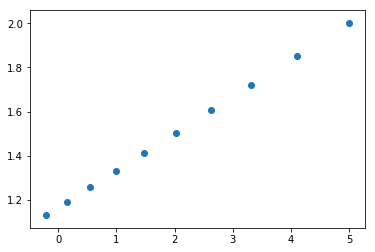

In [3]:
lambd = [6, 23, 7, 13, 16]
L = [[5, 2]]
result = np. array(red_vs_blueSIM(lambd[0], L))
fig, ax1 = plt.subplots()
ax1.scatter(result[:, 0], result[:, 1])

In [4]:
result

array([[ 5.        ,  2.        ],
       [ 4.1       ,  1.85      ],
       [ 3.31745   ,  1.719575  ],
       [ 2.63043938,  1.60507323],
       [ 2.02225597,  1.50370933],
       [ 1.47991662,  1.41331944],
       [ 0.99317294,  1.33219549],
       [ 0.55382128,  1.25897021],
       [ 0.15521288,  1.19253548],
       [-0.20810067,  1.13198322]])

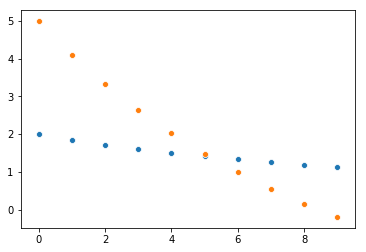

In [5]:
t = np.arange(0, result.shape[0])
sns.scatterplot(t, result[:, 1])
sns.scatterplot(t, result[:, 0])